# Project 4 : West Nile Virus Classification

# Contents

In this notebook, we will be covering the following:

1. [Model Tuning and Model Selection](#Model_Tuning_and_Model_Selection)
2. [Cost Benefit Analysis](#Cost_Benefit_Analysis)


# Model Tuning and Model Selection

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import math
import matplotlib.ticker as mticker

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import (confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, 
accuracy_score, precision_score, recall_score, f1_score, auc, precision_recall_curve, average_precision_score)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance 

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Pipeline1

import warnings
warnings.filterwarnings("ignore")

import time


In [2]:
#!pip install xgboost

In [3]:
# Import data

combined_train = pd.read_csv('../assets/combined_train.csv')
combined_test = pd.read_csv('../assets/combined_test.csv')

display(combined_train.head())
display(combined_test.head())

date  tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  sunrise  \
0  2007-05-29  88.0  62.5  75.5      58.5     65.5   0.0  10.5    421.0   
1  2007-05-29  88.0  62.5  75.5      58.5     65.5   0.0  10.5    421.0   
2  2007-05-29  88.0  62.5  75.5      58.5     65.5   0.0  10.5    421.0   
3  2007-05-29  88.0  62.5  75.5      58.5     65.5   0.0  10.5    421.0   
4  2007-05-29  88.0  62.5  75.5      58.5     65.5   0.0  10.5    421.0   

   sunset  ...  rainlag3  humidlag3   templag4  rainlag4  humidlag4  \
0  1917.0  ...  0.989038  63.514658  70.142857  0.989038  63.514658   
1  1917.0  ...  0.989038  63.514658  70.142857  0.989038  63.514658   
2  1917.0  ...  0.989038  63.514658  70.142857  0.989038  63.514658   
3  1917.0  ...  0.989038  63.514658  70.142857  0.989038  63.514658   
4  1917.0  ...  0.989038  63.514658  70.142857  0.989038  63.514658   

   sunrise_weekly_avgtemp  sunrise_weekly_templag2  dewpoint_c_species  \
0            30793.142857             30372.142857               117.0   
1            30793.142857             30372.142857                58.5   
2            30793.142857             30372.142857                58.5   
3            30793.142857             30372.142857               117.0   
4            30793.142857             30372.142857                58.5   

   sunrise_weekly_templag3  sunrise_weekly_templag1  
0             29951.142857             30793.142857  
1             29951.142857             30793.142857  
2             29951.142857             30793.142857  
3             29951.142857             30793.142857  
4             29951.142857             30793.142857  

[5 rows x 47 columns]

id        date  species  latitude  longitude  year  month  week  dayofweek  \
0   1  2008-06-11        2  41.95469 -87.800991  2008      6    24          2   
1   2  2008-06-11        1  41.95469 -87.800991  2008      6    24          2   
2   3  2008-06-11        3  41.95469 -87.800991  2008      6    24          2   
3   4  2008-06-11        0  41.95469 -87.800991  2008      6    24          2   
4   5  2008-06-11        0  41.95469 -87.800991  2008      6    24          2   

   tmax  ...   templag3  rainlag3  humidlag3   templag4  rainlag4  humidlag4  \
0  86.0  ...  71.428571  1.025114  60.865744  70.428571  1.025114  60.865744   
1  86.0  ...  71.428571  1.025114  60.865744  70.428571  1.025114  60.865744   
2  86.0  ...  71.428571  1.025114  60.865744  70.428571  1.025114  60.865744   
3  86.0  ...  71.428571  1.025114  60.865744  70.428571  1.025114  60.865744   
4  86.0  ...  71.428571  1.025114  60.865744  70.428571  1.025114  60.865744   

   sunrise_weekly_templag2  dewpoint_c_species  sunrise_weekly_templag3  \
0             30130.285714               111.0             29714.285714   
1             30130.285714                55.5             29714.285714   
2             30130.285714               166.5             29714.285714   
3             30130.285714                 0.0             29714.285714   
4             30130.285714                 0.0             29714.285714   

   sunrise_weekly_templag1  
0             30546.285714  
1             30546.285714  
2             30546.285714  
3             30546.285714  
4             30546.285714  

[5 rows x 47 columns]

In [4]:
combined_test.isnull().sum()

id                         0
date                       0
species                    0
latitude                   0
longitude                  0
year                       0
month                      0
week                       0
dayofweek                  0
tmax                       0
tmin                       0
tavg                       0
dewpoint                   0
wetbulb                    0
heat                       0
cool                       0
sunrise                    0
sunset                     0
codesum                    0
preciptotal                0
stnpressure                0
resultspeed                0
resultdir                  0
avgspeed                   0
yearweek                   0
tavg_c                     0
dewpoint_c                 0
rel_humidity               0
weekly_preciptotal         0
weekly_avgtemp             0
sunrise_weekly_avgtemp     0
templag1                   0
rainlag1                   0
humidlag1                  0
templag2      

In [5]:
combined_test['dewpoint_c_species'].value_counts()

0.0      71743
122.0      810
61.0       762
183.0      758
128.0      710
         ...  
47.5       151
196.5      151
187.5      151
68.5       151
50.0       151
Name: dewpoint_c_species, Length: 141, dtype: int64

In [6]:
combined_train.columns

Index(['date', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'preciptotal', 'stnpressure',
       'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'week',
       'dayofweek', 'yearweek', 'tavg_c', 'dewpoint_c', 'rel_humidity',
       'weekly_preciptotal', 'weekly_avgtemp', 'species', 'latitude',
       'longitude', 'wnvpresent', 'templag1', 'rainlag1', 'humidlag1',
       'templag2', 'rainlag2', 'humidlag2', 'templag3', 'rainlag3',
       'humidlag3', 'templag4', 'rainlag4', 'humidlag4',
       'sunrise_weekly_avgtemp', 'sunrise_weekly_templag2',
       'dewpoint_c_species', 'sunrise_weekly_templag3',
       'sunrise_weekly_templag1'],
      dtype='object')

In [7]:
# Rearranging combined_test 
combined_test = combined_test[['id','date', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'preciptotal', 'stnpressure',
       'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'week',
       'dayofweek', 'yearweek', 'tavg_c', 'dewpoint_c', 'rel_humidity',
       'weekly_preciptotal', 'weekly_avgtemp', 'species', 'latitude',
       'longitude', 'templag1', 'rainlag1', 'humidlag1',
       'templag2', 'rainlag2', 'humidlag2', 'templag3', 'rainlag3',
       'humidlag3', 'templag4', 'rainlag4', 'humidlag4',
       'sunrise_weekly_avgtemp', 'sunrise_weekly_templag2',
       'dewpoint_c_species', 'sunrise_weekly_templag3',
       'sunrise_weekly_templag1']]

combined_test

id        date  tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  \
0            1  2008-06-11  86.0  63.5  75.0      55.5     64.0   0.0  10.0   
1            2  2008-06-11  86.0  63.5  75.0      55.5     64.0   0.0  10.0   
2            3  2008-06-11  86.0  63.5  75.0      55.5     64.0   0.0  10.0   
3            4  2008-06-11  86.0  63.5  75.0      55.5     64.0   0.0  10.0   
4            5  2008-06-11  86.0  63.5  75.0      55.5     64.0   0.0  10.0   
...        ...         ...   ...   ...   ...       ...      ...   ...   ...   
116288  116289  2014-10-02  73.5  64.5  69.5      62.0     64.0   0.0   4.5   
116289  116290  2014-10-02  73.5  64.5  69.5      62.0     64.0   0.0   4.5   
116290  116291  2014-10-02  73.5  64.5  69.5      62.0     64.0   0.0   4.5   
116291  116292  2014-10-02  73.5  64.5  69.5      62.0     64.0   0.0   4.5   
116292  116293  2014-10-02  73.5  64.5  69.5      62.0     64.0   0.0   4.5   

        sunrise  ...  rainlag3  humidlag3   templag4  rainlag4  humidlag4  \
0         416.0  ...  1.025114  60.865744  70.428571  1.025114  60.865744   
1         416.0  ...  1.025114  60.865744  70.428571  1.025114  60.865744   
2         416.0  ...  1.025114  60.865744  70.428571  1.025114  60.865744   
3         416.0  ...  1.025114  60.865744  70.428571  1.025114  60.865744   
4         416.0  ...  1.025114  60.865744  70.428571  1.025114  60.865744   
...         ...  ...       ...        ...        ...       ...        ...   
116288    549.0  ...  1.590000  68.000000  74.428571  0.890000  71.000000   
116289    549.0  ...  1.590000  68.000000  74.428571  0.890000  71.000000   
116290    549.0  ...  1.590000  68.000000  74.428571  0.890000  71.000000   
116291    549.0  ...  1.590000  68.000000  74.428571  0.890000  71.000000   
116292    549.0  ...  1.590000  68.000000  74.428571  0.890000  71.000000   

        sunrise_weekly_avgtemp  sunrise_weekly_templag2  dewpoint_c_species  \
0                 30546.285714             30130.285714               111.0   
1                 30546.285714             30130.285714                55.5   
2                 30546.285714             30130.285714               166.5   
3                 30546.285714             30130.285714                 0.0   
4                 30546.285714             30130.285714                 0.0   
...                        ...                      ...                 ...   
116288            31371.428571             34116.428571                 0.0   
116289            31371.428571             34116.428571                 0.0   
116290            31371.428571             34116.428571                 0.0   
116291            31371.428571             34116.428571                 0.0   
116292            31371.428571             34116.428571                 0.0   

        sunrise_weekly_templag3  sunrise_weekly_templag1  
0                  29714.285714             30546.285714  
1                  29714.285714             30546.285714  
2                  29714.285714             30546.285714  
3                  29714.285714             30546.285714  
4                  29714.285714             30546.285714  
...                         ...                      ...  
116288             32979.214286             35841.857143  
116289             32979.214286             35841.857143  
116290             32979.214286             35841.857143  
116291             32979.214286             35841.857143  
116292             32979.214286             35841.857143  

[116293 rows x 47 columns]

In [8]:
# Dropping 'id' and 'date' column for test data
test_id = combined_test['id']
combined_test = combined_test.drop(columns = ['id','date'])

In [9]:
combined_test.shape

(116293, 45)

## Checking for class imbalance

In [10]:
# Baseline score
combined_train['wnvpresent'].value_counts(normalize = True)

0    0.947554
1    0.052446
Name: wnvpresent, dtype: float64

We see that the data is heavily skewed towards 0 i.e no wnvpresent. This will serve as a baseline for our model evaluation. Two ways to deal with the class imbalance are to use SMOTE or assign class weights. We will be using testing both methods and comparing the results. However, it is noted that models like Gradient Boost and AdaBoost cannot use class weights. As this is a classification problem, we will be using the following models,

- Logistic Regression
- SVC
- K Nearest Neighbor
- Decision Tree
- Extra Trees
- Random Forest
- AdaBoost
- Gradient Boost
- XGBoost

## Model Testing

### Train Test Split

In [11]:
# Assigning X and y

X = combined_train.drop(columns = ['wnvpresent','date'])
y = combined_train['wnvpresent']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [13]:
# Checking for stratification of target variable
display(y_train.value_counts(normalize = True))
display(y_test.value_counts(normalize = True))

0    0.947582
1    0.052418
Name: wnvpresent, dtype: float64

0    0.947469
1    0.052531
Name: wnvpresent, dtype: float64

In [14]:
# Initializing list for roc comparison of class weight models and smote models
gs_list = []
gs_sm_list = []

In [15]:
# Instiantiate models (default)
models = {'ada': AdaBoostClassifier(random_state=42),
          'gb': GradientBoostingClassifier(random_state=42),
          'xgb': xgb.XGBClassifier(random_state=42),
          'lr': LogisticRegression(random_state = 42),
          'knn': KNeighborsClassifier(),
          'svc': SVC(random_state = 42, probability = True),
          'dt': DecisionTreeClassifier(random_state = 42),
          'et': ExtraTreesClassifier(random_state = 42),
          'rf': RandomForestClassifier(random_state = 42)
        }

In [16]:
# Function to run model -- input model and params (without smote)
def run_model(mod, params_dict={}, grid_search=True):
    
    results = {}
    
    pipe = Pipeline([
            ('ss', StandardScaler()),
            (mod, models[mod])
            ])
    
    gs = GridSearchCV(pipe, param_grid = params_dict, cv=5, scoring = 'roc_auc', verbose=1, n_jobs=-1)
    gs.fit(X_train, y_train)
    pipe = gs
        
    # Retrieve metrics
    predictions = pipe.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    y_test_pred_prob = pipe.predict_proba(X_test)[:,1]
    y_train_pred_prob = pipe.predict_proba(X_train)[:,1]
    
    results['model'] = mod
    results['train_auc'] = roc_auc_score(y_train, y_train_pred_prob)
    results['test_auc'] = roc_auc_score(y_test, y_test_pred_prob)
    results['precision'] = precision_score(y_test, predictions)
    results['specificity'] = tn / (tn + fp)
    results['recall'] = recall_score(y_test, predictions)
    results['f_score'] = f1_score(y_test, predictions)
    
    gs_list.append(results)
    print('### BEST PARAMS ###')
    display(pipe.best_params_)
    
    print('### METRICS ###')
    display(results)
    
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    
    return pipe

### Non smote (Hyperparameter tuning)

In [18]:
ada_params = {'ada__n_estimators': [500, 1000],
              'ada__learning_rate': [0.9, 1.0],
             }

In [19]:
%%time

ada = run_model('ada', params_dict = ada_params, grid_search = True)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
### BEST PARAMS ###


{'ada__learning_rate': 0.9, 'ada__n_estimators': 500}

### METRICS ###


{'model': 'ada',
 'train_auc': 0.8910476484518355,
 'test_auc': 0.834310094852132,
 'precision': 0.75,
 'specificity': 0.9995982322217758,
 'recall': 0.021739130434782608,
 'f_score': 0.04225352112676056}

True Negatives: 2488
False Positives: 1
False Negatives: 135
True Positives: 3
Wall time: 1min 34s


In [20]:
gb_params = {'gb__n_estimators': [500, 1000],
             'gb__learning_rate': [0.4, 0.5, 0.6],
}

In [21]:
%%time

gb = run_model('gb', params_dict = gb_params, grid_search = True)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
### BEST PARAMS ###


{'gb__learning_rate': 0.6, 'gb__n_estimators': 500}

### METRICS ###


{'model': 'gb',
 'train_auc': 0.992968770776187,
 'test_auc': 0.799820660180155,
 'precision': 0.3013698630136986,
 'specificity': 0.9795098433105665,
 'recall': 0.15942028985507245,
 'f_score': 0.20853080568720378}

True Negatives: 2438
False Positives: 51
False Negatives: 116
True Positives: 22
Wall time: 3min 6s


In [22]:
xg_params = {'xgb__eval_metric' : ['auc'],
            'xgb__subsample' : [0.5], 
            'xgb__colsample_bytree' : [0.5], 
            'xgb__learning_rate' : [0.1],
            'xgb__max_depth' : [3], 
            'xgb__scale_pos_weight': [19], # ratio of neg instances/pos instances
            'xgb__n_estimators' : [500],
            'xgb__reg_alpha' : [0.5, 1],
            'xgb__reg_lambda' : [0.5, 1],
            'xgb__gamma' : [0.1, 3]
            }

In [23]:
%%time 
xg = run_model('xgb', params_dict = xg_params, grid_search = True)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
### BEST PARAMS ###


{'xgb__colsample_bytree': 0.5,
 'xgb__eval_metric': 'auc',
 'xgb__gamma': 0.1,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 3,
 'xgb__n_estimators': 500,
 'xgb__reg_alpha': 1,
 'xgb__reg_lambda': 0.5,
 'xgb__scale_pos_weight': 19,
 'xgb__subsample': 0.5}

### METRICS ###


{'model': 'xgb',
 'train_auc': 0.9421655816294562,
 'test_auc': 0.8277988366202597,
 'precision': 0.14991181657848324,
 'specificity': 0.8063479308959421,
 'recall': 0.6159420289855072,
 'f_score': 0.2411347517730496}

True Negatives: 2007
False Positives: 482
False Negatives: 53
True Positives: 85
Wall time: 51.5 s


In [24]:
lr_params = {'lr__penalty':['l2', None],
             'lr__solver':['newton-cg', 'sag'],
             'lr__C':[0.5, 1, 10],
             'lr__class_weight':[None, 'balanced']
}

In [25]:
%%time
lr = run_model('lr', params_dict = lr_params, grid_search = True)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
### BEST PARAMS ###


{'lr__C': 10,
 'lr__class_weight': 'balanced',
 'lr__penalty': 'l2',
 'lr__solver': 'newton-cg'}

### METRICS ###


{'model': 'lr',
 'train_auc': 0.8446820096138815,
 'test_auc': 0.8272369440028882,
 'precision': 0.1342534504391468,
 'specificity': 0.7227802330253114,
 'recall': 0.7753623188405797,
 'f_score': 0.22887700534759356}

True Negatives: 1799
False Positives: 690
False Negatives: 31
True Positives: 107
Wall time: 10 s


In [26]:
knn_params = {'knn__weights':['uniform'],
              'knn__algorithm':['auto']
             }

In [27]:
%%time
knn = run_model('knn', params_dict = knn_params, grid_search = True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
### BEST PARAMS ###


{'knn__algorithm': 'auto', 'knn__weights': 'uniform'}

### METRICS ###


{'model': 'knn',
 'train_auc': 0.9333611808560389,
 'test_auc': 0.7139995691186145,
 'precision': 0.3333333333333333,
 'specificity': 0.9903575733226195,
 'recall': 0.08695652173913043,
 'f_score': 0.13793103448275862}

True Negatives: 2465
False Positives: 24
False Negatives: 126
True Positives: 12
Wall time: 4.83 s


In [28]:
svc_params = {'svc__C':[10, 30],
              'svc__gamma':[0.01, 0.1], 
              'svc__kernel':['rbf', 'sigmoid'],
}

In [29]:
%%time
svc = run_model('svc', params_dict = svc_params, grid_search = True)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
### BEST PARAMS ###


{'svc__C': 30, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

### METRICS ###


{'model': 'svc',
 'train_auc': 0.8743464318307561,
 'test_auc': 0.7597341345398012,
 'precision': 0.0,
 'specificity': 1.0,
 'recall': 0.0,
 'f_score': 0.0}

True Negatives: 2489
False Positives: 0
False Negatives: 138
True Positives: 0
Wall time: 2min 8s


In [30]:
dt_params = {'dt__max_depth': [2, 3, 5, 7, 10],
            'dt__min_samples_split': [5, 10, 15, 20],
            'dt__min_samples_leaf': [2, 3, 4, 5, 6, 7],
            'dt__class_weight' : ['balanced']    
}

In [31]:
%%time
dt = run_model('dt', params_dict = dt_params, grid_search = True)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
### BEST PARAMS ###


{'dt__class_weight': 'balanced',
 'dt__max_depth': 5,
 'dt__min_samples_leaf': 2,
 'dt__min_samples_split': 5}

### METRICS ###


{'model': 'dt',
 'train_auc': 0.8559946332980699,
 'test_auc': 0.7715484363081617,
 'precision': 0.14333333333333334,
 'specificity': 0.7934913619927682,
 'recall': 0.6231884057971014,
 'f_score': 0.23306233062330628}

True Negatives: 1975
False Positives: 514
False Negatives: 52
True Positives: 86
Wall time: 12.4 s


In [32]:
et_params = {'et__n_estimators': [10, 20, 50, 100, 150, 200],
            'et__max_depth': [2, 3, 4, 5, 10, 20],
            'et__min_samples_leaf': [2, 5, 10],
            'et__class_weight' : ['balanced', 'balanced_subsample'],
}

In [33]:
%%time
et = run_model('et', params_dict = et_params, grid_search = True)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
### BEST PARAMS ###


{'et__class_weight': 'balanced',
 'et__max_depth': 10,
 'et__min_samples_leaf': 2,
 'et__n_estimators': 200}

### METRICS ###


{'model': 'et',
 'train_auc': 0.9170218955471422,
 'test_auc': 0.817929323807361,
 'precision': 0.14285714285714285,
 'specificity': 0.778224186420249,
 'recall': 0.6666666666666666,
 'f_score': 0.23529411764705882}

True Negatives: 1937
False Positives: 552
False Negatives: 46
True Positives: 92
Wall time: 2min 38s


In [34]:
rf_params = {'rf__n_estimators': [10, 20, 50, 100, 150, 200],
             'rf__max_depth': [5, 10, 15, 20, 25],
             'rf__min_samples_leaf': [2, 5, 10],
             'rf__class_weight' : ['balanced', 'balanced_subsample']
}

In [35]:
%%time
rf = run_model('rf', params_dict = rf_params, grid_search = True)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
### BEST PARAMS ###


{'rf__class_weight': 'balanced_subsample',
 'rf__max_depth': 10,
 'rf__min_samples_leaf': 2,
 'rf__n_estimators': 100}

### METRICS ###


{'model': 'rf',
 'train_auc': 0.9377127886937329,
 'test_auc': 0.8227709166710336,
 'precision': 0.16279069767441862,
 'specificity': 0.8408999598232222,
 'recall': 0.5579710144927537,
 'f_score': 0.2520458265139116}

True Negatives: 2093
False Positives: 396
False Negatives: 61
True Positives: 77
Wall time: 3min 33s


### SMOTE Hyperparameter tuning

In [36]:
# Function to run model -- input model and params
def run_model_smote(mod, params_dict={}, grid_search=True):
    
    results = {}
    
#     pipe = Pipeline([
#             ('ss', StandardScaler()),
#             (mod, models[mod])
#             ])
    
    pipe = Pipeline1([
        ('ss', StandardScaler()),
        ('sampling', SMOTE(random_state = 42)),  # set random_state so our score does not change
        (mod, models[mod])
    ])
    
    gs = GridSearchCV(pipe, param_grid = params_dict, cv=5, scoring = 'roc_auc', verbose=1, n_jobs=-1)
    gs.fit(X_train, y_train)
    pipe = gs
                
    # Retrieve metrics
    predictions = pipe.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    y_test_pred_prob = pipe.predict_proba(X_test)[:,1]
    y_train_pred_prob = pipe.predict_proba(X_train)[:,1]
    
    results['model'] = mod
    results['train_auc'] = roc_auc_score(y_train, y_train_pred_prob)
    results['test_auc'] = roc_auc_score(y_test, y_test_pred_prob)
    results['precision'] = precision_score(y_test, predictions)
    results['specificity'] = tn / (tn + fp)
    results['recall'] = recall_score(y_test, predictions)
    results['f_score'] = f1_score(y_test, predictions)
    
    gs_sm_list.append(results)
    print('### BEST PARAMS ###')
    display(pipe.best_params_)
    
    print('### METRICS ###')
    display(results)
    
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    
    return pipe

In [37]:
ada_sm_params = {'ada__n_estimators': [500, 1000],
              'ada__learning_rate': [0.9, 1.0],
             }

In [38]:
%%time

ada_sm = run_model_smote('ada', params_dict = ada_sm_params, grid_search = True)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
### BEST PARAMS ###


{'ada__learning_rate': 1.0, 'ada__n_estimators': 500}

### METRICS ###


{'model': 'ada',
 'train_auc': 0.86714477706523,
 'test_auc': 0.8023739235243769,
 'precision': 0.16204690831556504,
 'specificity': 0.8421052631578947,
 'recall': 0.5507246376811594,
 'f_score': 0.2504118616144975}

True Negatives: 2096
False Positives: 393
False Negatives: 62
True Positives: 76
Wall time: 3min 47s


In [39]:
gb_sm_params = {'gb__n_estimators': [500, 1000],
             'gb__learning_rate': [0.4, 0.5, 0.6],
}

In [40]:
%%time
gb_sm = run_model_smote('gb', params_dict = gb_sm_params, grid_search = True)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
### BEST PARAMS ###


{'gb__learning_rate': 0.6, 'gb__n_estimators': 500}

### METRICS ###


{'model': 'gb',
 'train_auc': 0.957122003931949,
 'test_auc': 0.8029358161417484,
 'precision': 0.2857142857142857,
 'specificity': 0.9598232221775813,
 'recall': 0.2898550724637681,
 'f_score': 0.28776978417266186}

True Negatives: 2389
False Positives: 100
False Negatives: 98
True Positives: 40
Wall time: 9min 24s


In [41]:
xg_sm_params = {'xgb__eval_metric' : ['auc'],
            'xgb__subsample' : [0.5], 
            'xgb__colsample_bytree' : [0.5], 
            'xgb__learning_rate' : [0.1],
            'xgb__max_depth' : [3], 
            'xgb__scale_pos_weight': [19], # ratio of neg instances/pos instances
            'xgb__n_estimators' : [500],
            'xgb__reg_alpha' : [0.5, 1],
            'xgb__reg_lambda' : [0.5, 1],
            'xgb__gamma' : [0.1, 3]
            }

In [42]:
%%time

xg_sm = run_model_smote('xgb', params_dict = xg_sm_params, grid_search = True)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
### BEST PARAMS ###


{'xgb__colsample_bytree': 0.5,
 'xgb__eval_metric': 'auc',
 'xgb__gamma': 0.1,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 3,
 'xgb__n_estimators': 500,
 'xgb__reg_alpha': 1,
 'xgb__reg_lambda': 0.5,
 'xgb__scale_pos_weight': 19,
 'xgb__subsample': 0.5}

### METRICS ###


{'model': 'xgb',
 'train_auc': 0.914196496271394,
 'test_auc': 0.8004058436832208,
 'precision': 0.11643835616438356,
 'specificity': 0.6890317396544797,
 'recall': 0.7391304347826086,
 'f_score': 0.2011834319526627}

True Negatives: 1715
False Positives: 774
False Negatives: 36
True Positives: 102
Wall time: 2min 6s


In [43]:
lr_sm_params = {'lr__penalty':['l2', None],
             'lr__solver':['newton-cg', 'sag'],
             'lr__C':[0.5, 1, 10],
             'lr__class_weight':[None, 'balanced']
}

In [44]:
%%time
lr_sm = run_model_smote('lr', params_dict = lr_sm_params, grid_search = True)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
### BEST PARAMS ###


{'lr__C': 10,
 'lr__class_weight': None,
 'lr__penalty': 'l2',
 'lr__solver': 'newton-cg'}

### METRICS ###


{'model': 'lr',
 'train_auc': 0.8439367424495485,
 'test_auc': 0.8228961051816397,
 'precision': 0.13240857503152584,
 'specificity': 0.7235837685817598,
 'recall': 0.7608695652173914,
 'f_score': 0.22556390977443608}

True Negatives: 1801
False Positives: 688
False Negatives: 33
True Positives: 105
Wall time: 20 s


In [45]:
knn_sm_params = {'knn__weights':['uniform'],
              'knn__algorithm':['auto']
             }

In [46]:
%%time
knn_sm = run_model_smote('knn', params_dict=knn_sm_params, grid_search=True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
### BEST PARAMS ###


{'knn__algorithm': 'auto', 'knn__weights': 'uniform'}

### METRICS ###


{'model': 'knn',
 'train_auc': 0.9618355430818257,
 'test_auc': 0.7060661111790428,
 'precision': 0.1588785046728972,
 'specificity': 0.8553635998392929,
 'recall': 0.4927536231884058,
 'f_score': 0.2402826855123675}

True Negatives: 2129
False Positives: 360
False Negatives: 70
True Positives: 68
Wall time: 6.49 s


In [47]:
svc_sm_params = {'svc__C':[10, 30],
              'svc__gamma':[0.01, 0.1], 
              'svc__kernel':['rbf', 'sigmoid'],
}

In [48]:
%%time
svc_sm = run_model_smote('svc', params_dict = svc_sm_params, grid_search=True)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
### BEST PARAMS ###


{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

### METRICS ###


{'model': 'svc',
 'train_auc': 0.8783380542235373,
 'test_auc': 0.7998119260980197,
 'precision': 0.1362940275650842,
 'specificity': 0.7734029730815588,
 'recall': 0.644927536231884,
 'f_score': 0.22503160556257898}

True Negatives: 1925
False Positives: 564
False Negatives: 49
True Positives: 89
Wall time: 16min 42s


In [49]:
dt_sm_params = {'dt__max_depth': [2, 3, 5, 7, 10],
            'dt__min_samples_split': [5, 10, 15, 20],
            'dt__min_samples_leaf': [2, 3, 4, 5, 6, 7],
            'dt__class_weight' : ['balanced']    
}

In [50]:
%%time
dt_sm = run_model_smote('dt', params_dict = dt_sm_params, grid_search=True)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
### BEST PARAMS ###


{'dt__class_weight': 'balanced',
 'dt__max_depth': 5,
 'dt__min_samples_leaf': 7,
 'dt__min_samples_split': 5}

### METRICS ###


{'model': 'dt',
 'train_auc': 0.8264946368654933,
 'test_auc': 0.776723379973332,
 'precision': 0.12980769230769232,
 'specificity': 0.7818400964242668,
 'recall': 0.5869565217391305,
 'f_score': 0.2125984251968504}

True Negatives: 1946
False Positives: 543
False Negatives: 57
True Positives: 81
Wall time: 29.4 s


In [51]:
et_sm_params = {'et__n_estimators': [10, 20, 50, 100, 150, 200],
            'et__max_depth': [2, 3, 4, 5, 10, 20],
            'et__min_samples_leaf': [2, 5, 10],
            'et__class_weight' : ['balanced', 'balanced_subsample'],
}

In [52]:
%%time
et_sm = run_model_smote('et', params_dict = et_sm_params, grid_search=True)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
### BEST PARAMS ###


{'et__class_weight': 'balanced',
 'et__max_depth': 10,
 'et__min_samples_leaf': 2,
 'et__n_estimators': 150}

### METRICS ###


{'model': 'et',
 'train_auc': 0.8850629715079628,
 'test_auc': 0.8152101129025684,
 'precision': 0.14424635332252836,
 'specificity': 0.7878666130976296,
 'recall': 0.644927536231884,
 'f_score': 0.23576158940397351}

True Negatives: 1961
False Positives: 528
False Negatives: 49
True Positives: 89
Wall time: 6min 54s


In [53]:
rf_sm_params = {'rf__n_estimators': [10, 20, 50, 100, 150, 200],
             'rf__max_depth': [5, 10, 15, 20, 25],
             'rf__min_samples_leaf': [2, 5, 10],
             'rf__class_weight' : ['balanced', 'balanced_subsample']
}

In [54]:
%%time
rf_sm = run_model_smote('rf', params_dict = rf_sm_params, grid_search=True)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
### BEST PARAMS ###


{'rf__class_weight': 'balanced',
 'rf__max_depth': 10,
 'rf__min_samples_leaf': 2,
 'rf__n_estimators': 200}

### METRICS ###


{'model': 'rf',
 'train_auc': 0.9055114420238576,
 'test_auc': 0.8178070466574667,
 'precision': 0.15087719298245614,
 'specificity': 0.8055443953394937,
 'recall': 0.6231884057971014,
 'f_score': 0.24293785310734464}

True Negatives: 2005
False Positives: 484
False Negatives: 52
True Positives: 86
Wall time: 8min 40s


## Model Evaluation

In [55]:
gs = pd.DataFrame(gs_list)
gs

model  train_auc  test_auc  precision  specificity    recall   f_score
0   ada   0.891048  0.834310   0.750000     0.999598  0.021739  0.042254
1    gb   0.992969  0.799821   0.301370     0.979510  0.159420  0.208531
2   xgb   0.942166  0.827799   0.149912     0.806348  0.615942  0.241135
3    lr   0.844682  0.827237   0.134253     0.722780  0.775362  0.228877
4   knn   0.933361  0.714000   0.333333     0.990358  0.086957  0.137931
5   svc   0.874346  0.759734   0.000000     1.000000  0.000000  0.000000
6    dt   0.855995  0.771548   0.143333     0.793491  0.623188  0.233062
7    et   0.917022  0.817929   0.142857     0.778224  0.666667  0.235294
8    rf   0.937713  0.822771   0.162791     0.840900  0.557971  0.252046

In [56]:
gs_sm = pd.DataFrame(gs_sm_list)
gs_sm

model  train_auc  test_auc  precision  specificity    recall   f_score
0   ada   0.867145  0.802374   0.162047     0.842105  0.550725  0.250412
1    gb   0.957122  0.802936   0.285714     0.959823  0.289855  0.287770
2   xgb   0.914196  0.800406   0.116438     0.689032  0.739130  0.201183
3    lr   0.843937  0.822896   0.132409     0.723584  0.760870  0.225564
4   knn   0.961836  0.706066   0.158879     0.855364  0.492754  0.240283
5   svc   0.878338  0.799812   0.136294     0.773403  0.644928  0.225032
6    dt   0.826495  0.776723   0.129808     0.781840  0.586957  0.212598
7    et   0.885063  0.815210   0.144246     0.787867  0.644928  0.235762
8    rf   0.905511  0.817807   0.150877     0.805544  0.623188  0.242938

In [57]:
gs.sort_values(by = 'test_auc', ascending = False)

model  train_auc  test_auc  precision  specificity    recall   f_score
0   ada   0.891048  0.834310   0.750000     0.999598  0.021739  0.042254
2   xgb   0.942166  0.827799   0.149912     0.806348  0.615942  0.241135
3    lr   0.844682  0.827237   0.134253     0.722780  0.775362  0.228877
8    rf   0.937713  0.822771   0.162791     0.840900  0.557971  0.252046
7    et   0.917022  0.817929   0.142857     0.778224  0.666667  0.235294
1    gb   0.992969  0.799821   0.301370     0.979510  0.159420  0.208531
6    dt   0.855995  0.771548   0.143333     0.793491  0.623188  0.233062
5   svc   0.874346  0.759734   0.000000     1.000000  0.000000  0.000000
4   knn   0.933361  0.714000   0.333333     0.990358  0.086957  0.137931

In [58]:
gs_sm.sort_values(by = 'test_auc', ascending = False)

model  train_auc  test_auc  precision  specificity    recall   f_score
3    lr   0.843937  0.822896   0.132409     0.723584  0.760870  0.225564
8    rf   0.905511  0.817807   0.150877     0.805544  0.623188  0.242938
7    et   0.885063  0.815210   0.144246     0.787867  0.644928  0.235762
1    gb   0.957122  0.802936   0.285714     0.959823  0.289855  0.287770
0   ada   0.867145  0.802374   0.162047     0.842105  0.550725  0.250412
2   xgb   0.914196  0.800406   0.116438     0.689032  0.739130  0.201183
5   svc   0.878338  0.799812   0.136294     0.773403  0.644928  0.225032
6    dt   0.826495  0.776723   0.129808     0.781840  0.586957  0.212598
4   knn   0.961836  0.706066   0.158879     0.855364  0.492754  0.240283

|Model (Class weights)|Train AUC|Test AUC|Precision|Specificity|Recall|F_score|
|---|---|---|---|---|---|---|
|**AdaBoost**|0.891|0.834|0.750|0.999|0.021|0.042|
|**XGBoost**|0.942|0.822|0.149|0.806|0.615|0.241|
|**Logistic Regression**|0.844|0.827|0.134|0.722|0.775|0.228|
|**Random Forest**|0.937|0.822|0.162|0.840|0.557|0.252|
|**Extra Trees**|0.917|0.817|0.142|0.778|0.666|0.235|
|**GradientBoost**|0.992|0.799|0.301|0.979|0.159|0.208|
|**Decision Trees**|0.855|0.771|0.143|0.793|0.623|0.233|
|**SVC**|0.874|0.759|0.000|1.000|0.000|0.000|
|**KNearestNeighbor**|0.933|0.714|0.333|0.990|0.086|0.137|

|Model (SMOTE)|Train AUC|Test AUC|Precision|Specificity|Recall|F_score|
|---|---|---|---|---|---|---|
|**AdaBoost**|0.867|0.802|0.162|0.842|0.550|0.250|
|**XGBoost**|0.914|0.800|0.116|0.689|0.739|0.201|
|**Logistic Regression**|0.843|0.822|0.132|0.723|0.760|0.225|
|**Random Forest**|0.905|0.817|0.150|0.805|0.623|0.242|
|**Extra Trees**|0.885|0.815|0.144|0.787|0.644|0.235|
|**GradientBoost**|0.957|0.802|0.285|0.959|0.289|0.287|
|**Decision Trees**|0.826|0.776|0.129|0.781|0.586|0.212|
|**SVC**|0.878|0.799|0.136|0.773|0.644|0.225|
|**KNearestNeighbor**|0.961|0.706|0.158|0.855|0.492|0.240|


We can see that models using class weights performed slightly better in terms of test AUC than the models using SMOTE. As such, we will choose our final model from this test group. For our final model selection, we took a few metrics into consideration, namely model overfit, test auc and recall. AdaBoosting had the best test AUC score but did poorly in terms of recall. Having a bad recall score means we would not be able to accurately identify clusters with the west nile virus, which could potentially lead to severe consequences. XGBoost had the next best test AUC score, but had high degree of overfit (12%). We have decided to choose Logistic Regression as it had low degree of overfit (2%) as well as good test AUC and recall scores.

### ROC AUC Curve

In [59]:
def plot_roc(model_dict, plot_top=False):
    fig, ax = plt.subplots(1, 1, figsize=(12,10))
    axes = {}
    for i, m in enumerate(model_dict.keys()):
        axes[f'ax{i}'] = plot_roc_curve(m, X_test, y_test, ax=ax, name=model_dict[m])
    if plot_top:
        for i, a in enumerate(axes):
            if i != 0:
                axes[a].line_.set_color('lightgrey')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guess')
    plt.title('ROC-AUC Curve Comparison', fontsize=22)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend(fontsize=12)

In [60]:
model_dict = {
    ada: 'AdaBoostClassifier',
    gb: 'GradientBoostingClassifier',
    xg: 'xgb.XGBClassifier',
    lr: 'LinearRegression',
    knn: 'KNearestNeighbor',
    svc: 'SVC',
    dt: 'DecisionTreeClassifier',
    et: 'ExtraTreeClassifier',
    rf: 'RandomForestClassifier'
    }

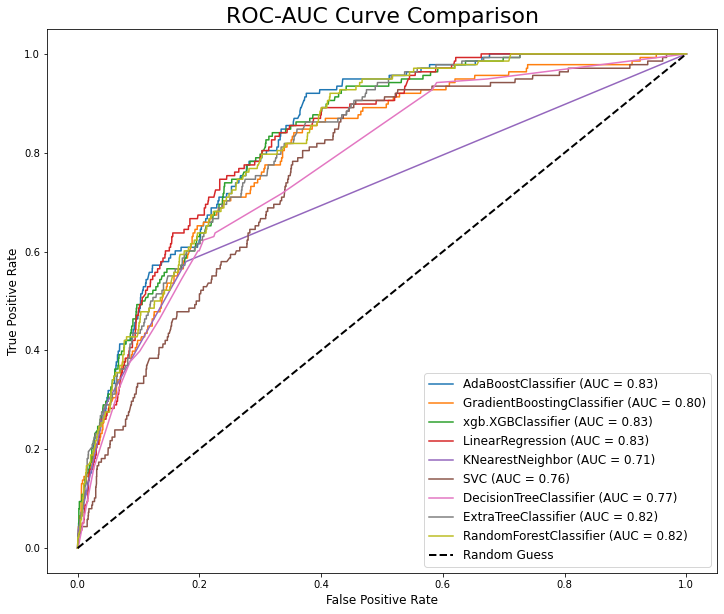

In [61]:
plot_roc(model_dict)

The boosting and Logistic Regression models are seen to have a good AUC score, with K Nearest Neighbor being the worst performer.

In [62]:
model_dict_sm = {
    ada_sm: 'AdaBoostClassifier with SMOTE',
    gb_sm: 'GradientBoostingClassifier wth SMOTE',
    xg_sm: 'xgb.XGBClassifier with SMOTE',
    lr_sm: 'LinearRegression with SMOTE',
    knn_sm: 'KNearestNeighbor with SMOTE',
    svc_sm: 'SVC with SMOTE',
    dt_sm: 'DecisionTreeClassifier with SMOTE',
    et_sm: 'ExtraTreeClassifier with SMOTE',
    rf_sm: 'RandomForestClassifier with SMOTE'
    }

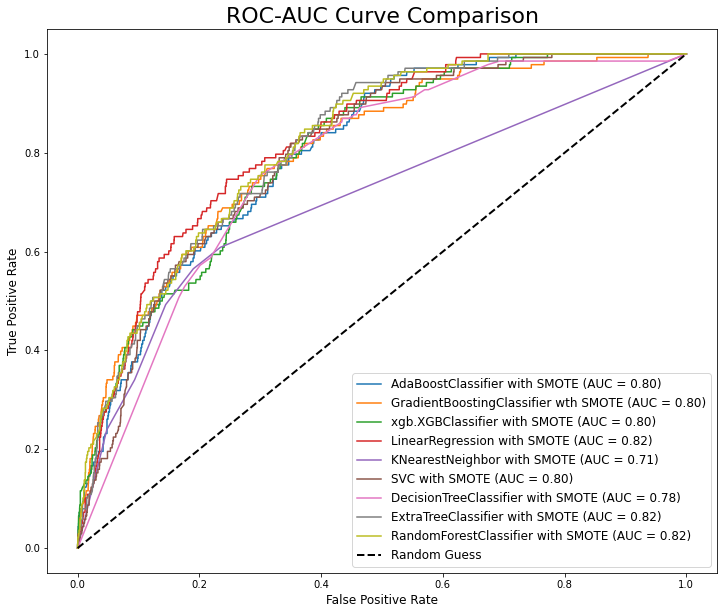

In [63]:
plot_roc(model_dict_sm)

With SMOTE, the AUC scores for all models seem to be slighly worse than the models using class weights. K Nearest Neighbor was still the worst performing model.

## Selected Model (Logistic Regression without SMOTE)

### Feature importance

In [64]:
lr_pipe = Pipeline([
        ('ss', StandardScaler()),
        ('lr', LogisticRegression(penalty = 'l2', solver = 'newton-cg', C = 10, class_weight = 'balanced'))
])

In [65]:
X_train

tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  sunrise  sunset  \
10140  85.5  59.5  73.0      56.5     63.5   0.0   8.0    522.0  1819.0   
7737   86.0  64.0  75.0      59.0     65.0   0.0  10.0    528.0  1809.0   
8079   57.5  46.0  52.0      41.5     47.0  13.0   0.0    547.0  1735.0   
2449   90.0  69.5  80.0      70.5     73.0   0.0  15.0    506.0  1843.0   
449    85.0  69.0  77.0      68.5     71.0   0.0  12.0    432.0  1924.0   
...     ...   ...   ...       ...      ...   ...   ...      ...     ...   
2721   90.5  68.0  79.5      65.5     70.0   0.0  14.5    513.0  1834.0   
1009   91.5  69.0  80.5      62.5     69.5   0.0  15.5    445.0  1911.0   
999    91.5  69.0  80.5      62.5     69.5   0.0  15.5    445.0  1911.0   
4894   83.0  61.5  72.5      59.5     64.5   0.0   7.5    437.0  1919.0   
6831   89.0  73.0  81.5      66.5     71.0   0.0  16.5    438.0  1918.0   

       codesum  ...  rainlag3  humidlag3   templag4  rainlag4  humidlag4  \
10140      0.0  ...  0.465000  61.000000  73.642857  0.075000  54.000000   
7737       0.0  ...  0.525000  62.000000  73.785714  0.755000  62.000000   
8079       1.0  ...  0.989038  63.514658  75.785714  0.140000  66.000000   
2449       1.0  ...  1.225000  54.000000  74.928571  0.645000  56.000000   
449        1.0  ...  0.330000  66.000000  69.071429  0.989038  63.514658   
...        ...  ...       ...        ...        ...       ...        ...   
2721       0.0  ...  1.430000  73.000000  78.571429  1.225000  54.000000   
1009       0.5  ...  0.525000  51.000000  76.214286  0.655000  54.000000   
999        0.5  ...  0.525000  51.000000  76.214286  0.655000  54.000000   
4894       1.0  ...  0.210000  55.000000  80.500000  0.660000  66.000000   
6831       0.0  ...  0.989038  63.514658  76.285714  0.105000  61.000000   

       sunrise_weekly_avgtemp  sunrise_weekly_templag2  dewpoint_c_species  \
10140            37472.142857             39373.714286               169.5   
7737             31642.285714             40014.857143               177.0   
8079             30358.500000             32780.928571                83.0   
2449             37986.142857             40263.142857               211.5   
449              31134.857143             32924.571429               205.5   
...                       ...                      ...                 ...   
2721             36936.000000             36532.928571               196.5   
1009             34964.285714             32071.785714               187.5   
999              34964.285714             32071.785714               187.5   
4894             31276.714286             31089.428571               178.5   
6831             35040.000000             34101.428571                66.5   

       sunrise_weekly_templag3  sunrise_weekly_templag1  
10140             35906.142857             41424.428571  
7737              38430.857143             31642.285714  
8079              29264.500000             32663.714286  
2449              39757.142857             36034.428571  
449               31073.142857             31782.857143  
...                        ...                      ...  
2721              40820.142857             38511.642857  
1009              32739.285714             33343.214286  
999               32739.285714             33343.214286  
4894              29279.000000             30246.642857  
6831              34164.000000             35040.000000  

[7879 rows x 45 columns]

In [66]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('lr',
                 LogisticRegression(C=10, class_weight='balanced',
                                    solver='newton-cg'))])

In [67]:
lr_pipe.named_steps['lr']

LogisticRegression(C=10, class_weight='balanced', solver='newton-cg')

In [68]:
lr_pipe.named_steps['lr'].coef_[0]

array([-2.17860078, -1.41054845,  1.68126556, -2.23214849,  1.94829217,
       -0.5328735 ,  1.94331727, -0.0267958 ,  3.00365761,  0.19635409,
       -0.01844603,  0.33534806, -0.657351  , -0.06955441,  0.51041022,
        0.53451678,  0.05326365,  4.38266399,  0.11642357,  0.62037994,
        1.68126556, -2.23214849,  0.90785548,  0.79183411,  0.46231618,
       -0.02842541, -0.06641846, -0.4672032 , -2.19711642,  0.46071562,
       -0.16683646,  4.84717557,  0.61308542, -0.69361214, -2.82119042,
       -0.04923851, -0.23131312,  0.16298258, -0.05342861, -0.01859134,
       -0.61791049, -6.61907493,  0.45583598,  4.40037499,  3.11367946])

In [69]:
coef_df = pd.DataFrame(lr_pipe.named_steps['lr'].coef_[0], columns = ['coef'])
coef_df['Features'] = X.columns
coef_df = coef_df[['Features','coef']]
coef_df


Features      coef
0                      tmax -2.178601
1                      tmin -1.410548
2                      tavg  1.681266
3                  dewpoint -2.232148
4                   wetbulb  1.948292
5                      heat -0.532874
6                      cool  1.943317
7                   sunrise -0.026796
8                    sunset  3.003658
9                   codesum  0.196354
10              preciptotal -0.018446
11              stnpressure  0.335348
12              resultspeed -0.657351
13                resultdir -0.069554
14                 avgspeed  0.510410
15                     year  0.534517
16                    month  0.053264
17                     week  4.382664
18                dayofweek  0.116424
19                 yearweek  0.620380
20                   tavg_c  1.681266
21               dewpoint_c -2.232148
22             rel_humidity  0.907855
23       weekly_preciptotal  0.791834
24           weekly_avgtemp  0.462316
25                  species -0.028425
26                 latitude -0.066418
27                longitude -0.467203
28                 templag1 -2.197116
29                 rainlag1  0.460716
30                humidlag1 -0.166836
31                 templag2  4.847176
32                 rainlag2  0.613085
33                humidlag2 -0.693612
34                 templag3 -2.821190
35                 rainlag3 -0.049239
36                humidlag3 -0.231313
37                 templag4  0.162983
38                 rainlag4 -0.053429
39                humidlag4 -0.018591
40   sunrise_weekly_avgtemp -0.617910
41  sunrise_weekly_templag2 -6.619075
42       dewpoint_c_species  0.455836
43  sunrise_weekly_templag3  4.400375
44  sunrise_weekly_templag1  3.113679

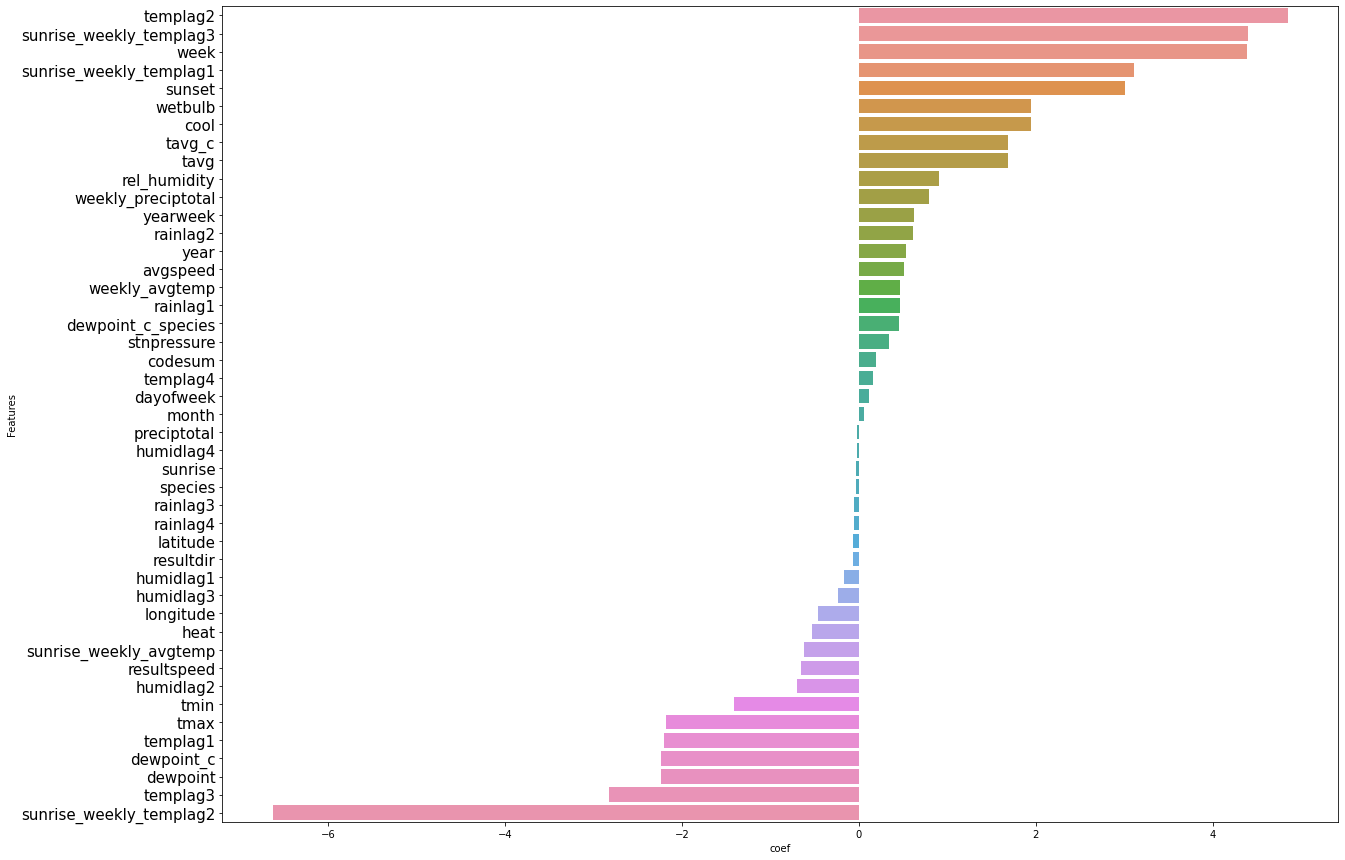

In [70]:
coef_df1 = coef_df.sort_values('coef', ascending = False)

plt.figure(figsize=(20,15))
sns.barplot(x = coef_df1['coef'], y = coef_df1['Features'])
plt.yticks(fontsize = 15);

The lag features created have the strongest in predicting if there is presence of west nile virus or not. The other strong predictors seem to be related to temperature, which corroborates with our findings earlier.

In [71]:
proba = lr_pipe.predict_proba(combined_test)
proba

array([[0.99832183, 0.00167817],
       [0.99893098, 0.00106902],
       [0.99736649, 0.00263351],
       ...,
       [0.92050059, 0.07949941],
       [0.92050059, 0.07949941],
       [0.92050059, 0.07949941]])

In [72]:
proba_df = pd.DataFrame(proba)
proba_df['Id'] = test_id
proba_df

0         1      Id
0       0.998322  0.001678       1
1       0.998931  0.001069       2
2       0.997366  0.002634       3
3       0.999319  0.000681       4
4       0.999319  0.000681       5
...          ...       ...     ...
116288  0.920501  0.079499  116289
116289  0.920501  0.079499  116290
116290  0.920501  0.079499  116291
116291  0.920501  0.079499  116292
116292  0.920501  0.079499  116293

[116293 rows x 3 columns]

In [73]:
proba_df.drop(columns = [0], inplace = True)
proba_df = proba_df[['Id', 1]]
proba_df = proba_df.rename(columns = {1:'WnvPresent'})
proba_df

Id  WnvPresent
0            1    0.001678
1            2    0.001069
2            3    0.002634
3            4    0.000681
4            5    0.000681
...        ...         ...
116288  116289    0.079499
116289  116290    0.079499
116290  116291    0.079499
116291  116292    0.079499
116292  116293    0.079499

[116293 rows x 2 columns]

In [74]:
proba_df.to_csv('../assets/submission_1.csv', index =False)

![kagglescore1.PNG](../assets/kagglescore1.PNG)

# Cost Benefit Analysis

West Nile virus (WNV) is transmitted through the bite of an infected mosquito and has the potential to cause prolonged disability or death in people who are infected. WNV was first detected in Chicago in 2001 among dead birds. The following year, Chicago faced its largest epidemic during which 225 human WNV cases were reported, including 22 fatalities. Although fewer human infections were reported annually from 2003 through 2006, WNV activity is expected to continue in Chicago for the foreseeable future. ([Chicago Department of Public Health,2007](https://www.chicago.gov/dam/city/depts/cdph/comm_dis/general/Communicable_Disease/CD_CDInfo_Jun07_WNV.pdf))



#### Cost of spraying

As there are no specific medications to treat WNV in people, the most effective method to prevent infection is to prevent mosquito bites. As such, the Chicago Department of Public Health (CDPH) conducts mosquito spraying as part of their measure to reduce the occurrence of WNV. The product is sprayed by a truck-mounted fogger using very small amount of pesticide in a process known as Ultra Low Volume (ULV) fogging. The mist of microscopic droplets or "fog" is airborne and is not intended to leave significant residues. Flying mosquitoes are killed by contact with the fog. Mosquito spraying is done at night when most mosquitoes are flying and traffic is minimal. One of the materials that is currently in use is Zenivex E4 (active ingredient Etofenprox), an EPA "reduced risk" product. ([Chicago Department of Public Health](https://www.chicago.gov/content/dam/city/depts/cdph/Mosquito-Borne-Diseases/Zenivex.pdf))

The cost of Zenivex E4 is about \\$80 per gallon ([North Dakota Department of Health, 2013](http://www.gfmosquito.com/wp-content/uploads/2013/06/2013-North-Dakota-Bid-Tabulation.pdf)). Given the current rate of spraying and assuming a total spray duration of 5 hours, the cost of pesticides for each sprayer truck is \\$843.76 - \\$1687.50. Given that the total area of Chicago is 606.1 km2, it would take about 1000 trucks at the same time to cover the entire area. This brings the cost of spraying to be around \\$843,760 - \\$1,687,500.



#### Medical Costs
In 2012, 60 human cases of WNV infection, including four fatalities, were reported in Chicago. The ages of cases ranged from 15-81 years with a median age of 56 years. Fifty-three percent of cases were male. Dates of symptom onset for all cases ranged from July 1 to October 8. It is likely that the above normal temperatures combined with drought resulted in more WNV activity in mosquitoes and more human cases. The risk of human infection was highest in August and early September, with infection rates among wild mosquitoes as high as 22\% during some weeks. ([Chicago Department of Public Health, 2013](https://www.chicago.gov/content/dam/city/depts/cdph/statistics_and_reports/CDInfo_2013_JULY_WNV.pdf))

A rough estimate puts cost per WNV case at $\approx$\\$33,143 per inpatient and $\approx$\\$6,317 per outpatient for all treatments. Cost for each WNV patient estimated to have spent time in a nursing home was $\approx$\\$18,097. Productivity loss during symptomatic WNND cost \\$10,800 per patient <60 years of age and \\$7,500 per patient >60 years of age (Table 3). Total medical costs accrued by all WNND patients was $\approx$\\$2,791,838; total costs for all cases (medical cost plus productivity loss) was $\approx$\\$3,710,006. 
([Barber LM, Schleier JJ 3rd, Peterson RK, 2010](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/))


Comparing the cost to spray and the medical costs incurred because of WNV cases in a year, it is clear that the medical costs required to cover the WNV cases far exceed the costs to spray. As such, it seems that it is more cost-efficient to conduct more mosquito spraying in an attempt to lower medical costs incurred. However, we also have to look into analysing the spray efficacy in order to determine if it is indeed a more cost efficient method to reduce costs incurred or whether a more effective alternative solution should be pursued further.

### Spray Efficacy

In [75]:
# import data for investigating spray efficacy
spray = pd.read_csv('../assets/spray.csv')
train = pd.read_csv('../assets/train.csv')

In [76]:
# quick processing function for spray and train for plotting
def preprocess_df(df):
    # lowercase all column names
    df.columns = [i.lower() for i in df.columns]
    
    # Converting Date to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Add year, month, week and day of week features
    df['year'] = df['date'].apply(lambda x: x.year)
    df['month'] = df['date'].apply(lambda x: x.month)
    df['week'] = df['date'].apply(lambda x: x.week)
    df['dayofweek'] = df['date'].apply(lambda x: x.dayofweek)
    
    return df

In [77]:
preprocess_df(train)
preprocess_df(spray);

In [78]:
spray['date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: date, dtype: int64

Looking at the above dates when spraying operations were done, we see that our spray dataset is very limited in data as only 2 years of data are available, 2011 and 2013. In 2011, only 2 spray operations were carried out on two different days. The reason for the low number of sprayings could be because the number of WNV occurences were not high in that year. In 2013, more spraying operations were carried out, on 8 different days (7 different weeks, 2 spray ops were done on the same week). It makes sense to increase the number of spraying operations on 2013 with the high outbreak of WNV on that year.

Let us see next the spray and WNV occurence locations to see how accurately they coincide with each other.

In [84]:
def target_plot(target, color):
    for year in [2011, 2013]:
        fig, ax1 = plt.subplots(figsize=(10,5))
        temp_df = combined_train[combined_train['year']==year].groupby(['week'])[target].sum().to_frame()

        sns.lineplot(x=temp_df.index, y=temp_df[target],
                     ci=None, color=color, label=f'{target}', ax=ax1)
        ax1.set_ylabel(f'{target}', fontsize=13)
        ax1.legend(loc=1)
        
        if year in spray['year'].unique():
            for date in spray[spray['year'] == year].groupby('week').mean().index:
                plt.axvline(date, linestyle='--', color='black', alpha=0.5, label='Spray')
        
        plt.legend([f'{target}', 'Spray'])
        plt.title(f'{target} in {year}')
        plt.tight_layout()

In [100]:
# function for map visualisation for spraying and WNV locations
def map_viz(df, color, Spray_or_WNVoutbreak):
    alpha_cm = color
    alpha_cm._init()
    alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]

    aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

    lon_lat_box = (-88, -87.5, 41.6, 42.1)

    if Spray_or_WNVoutbreak == 'Spray':
        # Spray location
        X = df[['longitude', 'latitude']].drop_duplicates().values
        kd = KernelDensity(bandwidth=0.015)
        kd.fit(X)        
    else:
        #Traps where only WNV is present
        wnv = df[df['wnvpresent'] == 1]
        wnv = wnv.groupby(['date','longitude', 'latitude']).max()['wnvpresent'].reset_index()
        X = wnv[['longitude', 'latitude']].values
        kd = KernelDensity(bandwidth=0.015)
        kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

    #kernel density
    plt.figure(figsize=(10,14))
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
    plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

    # trap locations
    trap_locations = train[['longitude', 'latitude']].drop_duplicates().values
    plt.scatter(trap_locations[:,0], trap_locations[:,1], marker='o', c='b', label='Trap Locations')

    # wnn outbreak locations
    wnv_locations = train[train['wnvpresent'] != 0][['longitude', 'latitude']].drop_duplicates().values
    plt.scatter(wnv_locations[:,0], wnv_locations[:,1], marker='*', c='r', label='WNV Outbreak Locations')

    plt.title(f'{Spray_or_WNVoutbreak} Locations in Chicago', fontsize=25)
    plt.legend(fontsize=15)
    plt.xlabel('Longitude', fontsize=13)
    plt.ylabel('Latitude', fontsize=13)
    plt.savefig(f'../images/{Spray_or_WNVoutbreak} Locations.png')

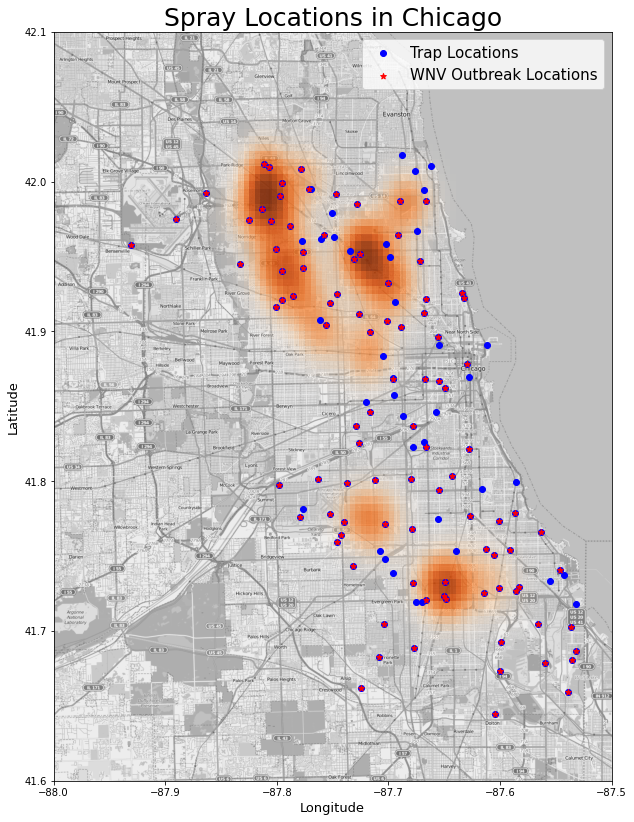

In [101]:
map_viz(spray, plt.cm.Oranges, 'Spray')

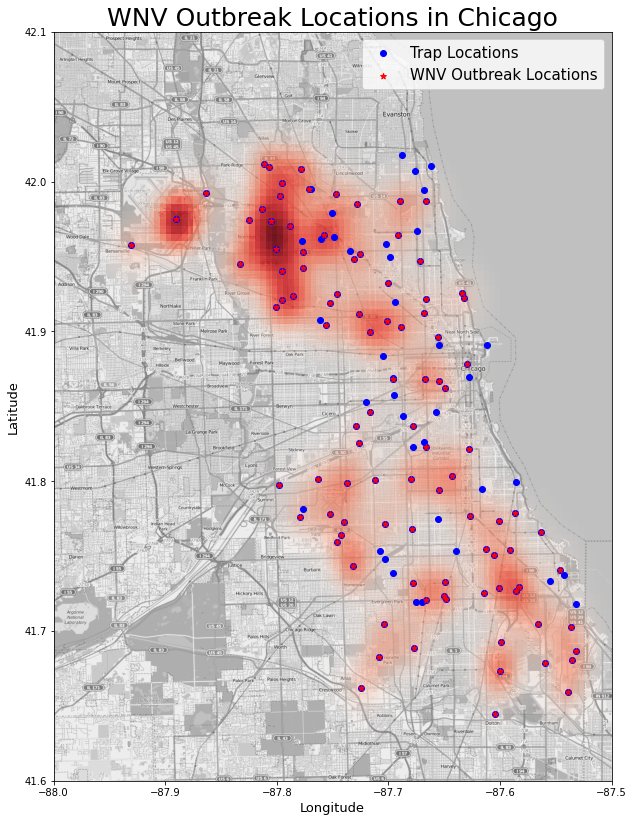

In [102]:
map_viz(train, plt.cm.Reds, 'WNV Outbreak')

The first map above shows the spray locations in orange clouds, while the second map shows WNV occurences in red clouds. Both maps also display trap and WNV specimens found in traps.

Comparing these 2 maps, we can see that not all spraying locations are accurate to locations where WNV occured.

Accurate spraying locations on WNV locations:
- North-West area from city of Chicago (-87.7 longitude, 41.95 latitude)
- Further North-West from city of Chicago, also the most dense WNV occurences (-87.8 longitude, 41.9 to 42.0 latitude)
- A small spot South of the city (-87.65 longitude, 41.7 latitude)

WNV locations inadequately or not covered by spraying:
- Furthest North-West from city of Chicago (-87.9 longitude, 42.0 latitude)
- South of city of Chicago (huge scattered area) inadequately covered (-87.5 to -87.8 longitude, 41.6 to 41.8 latitude)
- A small spot South-West of the city inadequatly/inaccurately covered (-87.7 longtitude, 41.8 latitude). This spray location seems inaccurately targeted as a few WNV occurences were beside it

The above analysis tells us that majority of the locations sprayed were accurate and coincides to where WNV occured. However, these locations were not enough as there were much more locations, including huge scattered areas where WNV occured but were not sprayed. To increase the efficacy of spraying which will translate to better cost-benefit, we must keep in mind to focus on the right areas to spray, as well as decrease unnecessary sprays.

Next, we will plot the number of WNV occurences and the days of spraying operations, to find out if the sprayings actually helped in reducing the number of WNV occurences.

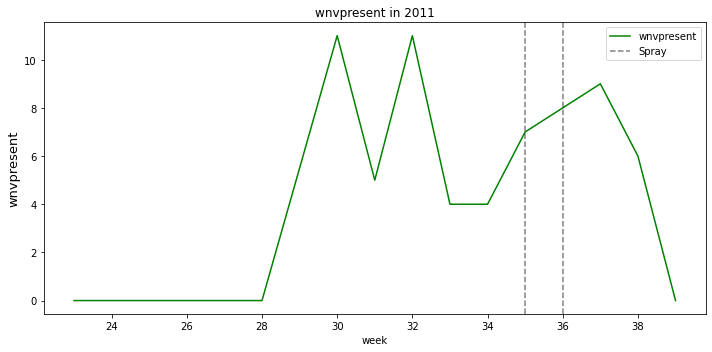

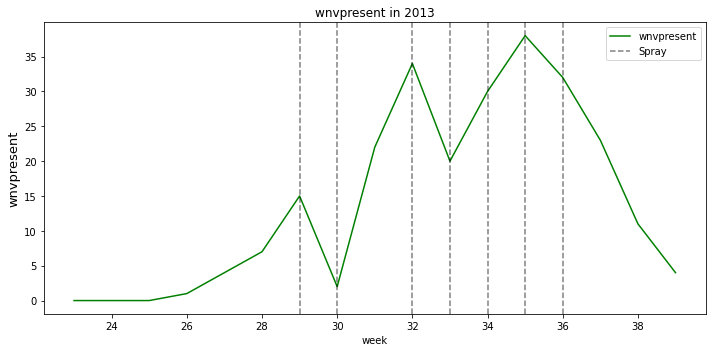

In [83]:
target_plot('wnvpresent', 'green')

Looking at the above line plots, for 2011, it is hard to tell if the sprayings helped in reducing the number of WNV cases as there were only 2 sprayings carried out, with no obvious pattern.

For 2013, the sprayings were done on almost every week from week 29 to week 36 (from 17 July 2013 to 5 September 2013). At weeks where WNV occurences peak (weeks 29, 32, and 35), spraying was done, which might explain the reduction in WNV on the next immediate weeks (weeks 30, 33, and 36 and beyond). Although WNV increased again subsequently in-between the weeks aforementioned, from this pattern, we can see that spraying actually helped in curbing WNV occurences.

### Cost Benefit Analysis Conclusion

To conclude our cost-benefit analysis, we have evidence that despite some inadequate sprayings done in terms of location, overall, we can still see that spraying does in fact still help curb WNV in general. Considering the fact that medical costs are much higher than spraying costs, and that there are currently no specific medications to treat patients with WNV, it is thus important to make sure spraying operations are carried out at critical locations. Even though there will be higher spendage in spraying operations, increased spraying operations would most likely reduce the number of WNV occurences and patients, which would ultimately reduce medical costs and therefore overall costs.

We will next proceed with recommendations based on our cost benefit analysis and predictive model.

## Recommendations

As covered in our cost-benefit analysis, we will focus on increasing the number of productive and accurate sprays in critical areas in hopes to lessen the number of WNV patients. With no specific medications to treat patients with WNV, and high medical costs, prevention is the best solution. Cost-wise, with sprayer trucks using Zenivex E4 conducting their operations for 5 hours on a total land area of Chicago of 606.1 km2, we have calculated that the total cost of spraying is between \\$844k to \\$1.69 million. That is less than half of what medical costs plus productivity loss would be, at a calculated value of around \\$3.7 million. This goes to show that even though there will be higher spending in spraying operations, increased spraying operations would reduce the number of WNV occurences and patients, which would ultimately reduce medical costs and therefore overall costs. The citizens of Chicago can also live healthily with lesser fear of WNV.

With evidence that spraying helps, we are firmly on the stand that spraying operations should be increased with improved accuracy on the spraying areas. Below, with the aid of our production model, we have coded a function that predicts and visualizes the areas that are of high and moderate risks of WNV for each month of each year. 

In [87]:
test = pd.read_csv('../assets/test.csv')

In [88]:
pred_df = pd.merge(proba_df, test)

In [89]:
pred_df['Date'] = pd.to_datetime(pred_df['Date'])

In [90]:
pred_df['year'] = pred_df['Date'].apply(lambda x: x.year)
pred_df['month'] = pred_df['Date'].apply(lambda x: x.month)
pred_df['week'] = pred_df['Date'].apply(lambda x: x.week)
pred_df['dayofweek'] = pred_df['Date'].apply(lambda x: x.dayofweek)

In [91]:
# Creating dataframes for each year in predicted (test) dataset
df_2008 = pred_df[pred_df['year'] == 2008].reset_index(drop=True)
df_2010 = pred_df[pred_df['year'] == 2010].reset_index(drop=True)
df_2012 = pred_df[pred_df['year'] == 2012].reset_index(drop=True)
df_2014 = pred_df[pred_df['year'] == 2014].reset_index(drop=True)

In [92]:
# Creating separate month dataframes
# year 2008
df_2008_7 = df_2008[df_2008['month'] == 7].reset_index(drop=True)
df_2008_8 = df_2008[df_2008['month'] == 8].reset_index(drop=True)
df_2008_9 = df_2008[df_2008['month'] == 9].reset_index(drop=True)

# year 2010
df_2010_7 = df_2010[df_2010['month'] == 7].reset_index(drop=True)
df_2010_8 = df_2010[df_2010['month'] == 8].reset_index(drop=True)
df_2010_9 = df_2010[df_2010['month'] == 9].reset_index(drop=True)

# year 2012
df_2012_7 = df_2012[df_2012['month'] == 7].reset_index(drop=True)
df_2012_8 = df_2012[df_2012['month'] == 8].reset_index(drop=True)
df_2012_9 = df_2012[df_2012['month'] == 9].reset_index(drop=True)

In [95]:
# Predictive map visualisation function
def pred_map(df_year_month, year, month):
    mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

    aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
    lon_lat_box = (-88, -87.5, 41.6, 42.05)

    plt.figure(figsize=(10,16))
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)

#     # KDE plot of all predicted cases
#     sns.kdeplot(data=df_year_month, x='Longitude', y='Latitude', fill=True, cmap='coolwarm', alpha = 0.7)

    # Plot very high probability
    plt.scatter(data=df_year_month[df_year_month['WnvPresent'] > 0.95], x='Longitude', y='Latitude', 
                s=300, facecolors='none', edgecolors='red', linewidth = 1.5, label='>95% WNV Probability')

    # Plot moderate probability
    plt.scatter(data=df_year_month[df_year_month['WnvPresent'] > 0.65],
                
                x='Longitude', y='Latitude', marker='x', 
                color='blue', label='>65% WNV Probability')

    plt.title(f'Locations with Risk of WNV for month {month} of year {year}', fontsize=18)
    plt.legend()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.savefig(f'../images/pred_map for {month} {year}.png', dpi=300);

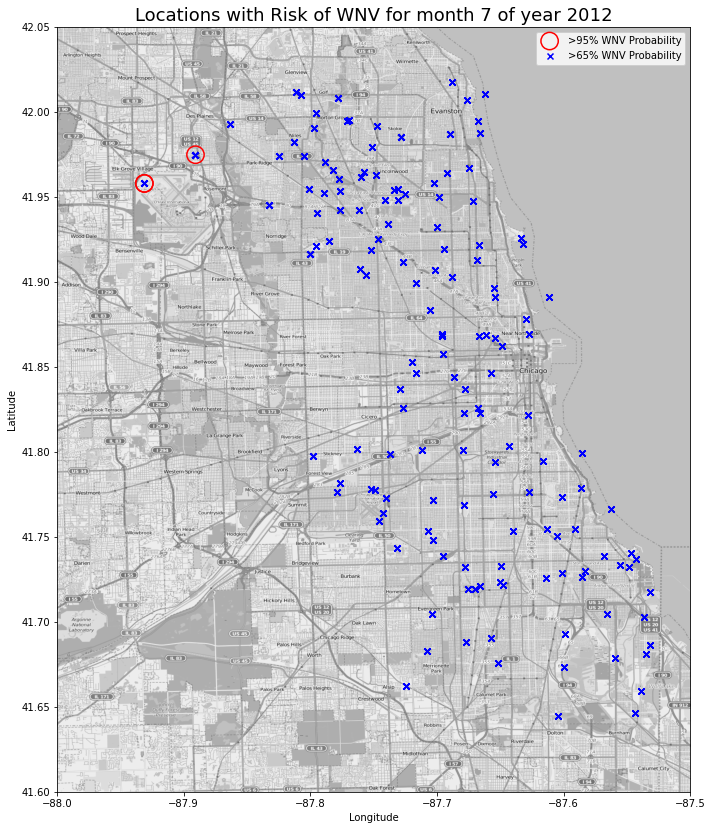

In [97]:
pred_map(df_2012_7, 2012, 7)

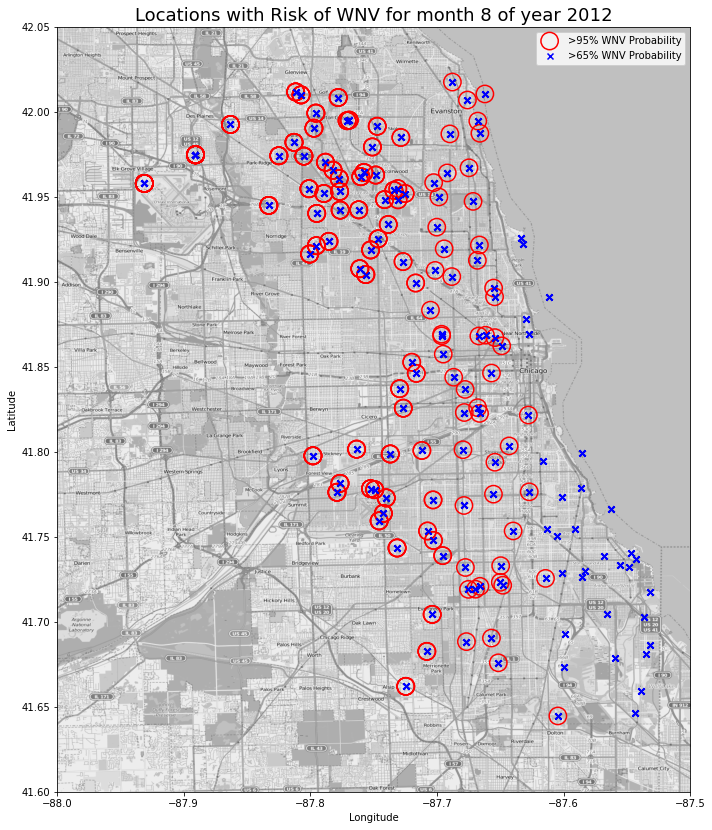

In [98]:
pred_map(df_2012_8, 2012, 8)

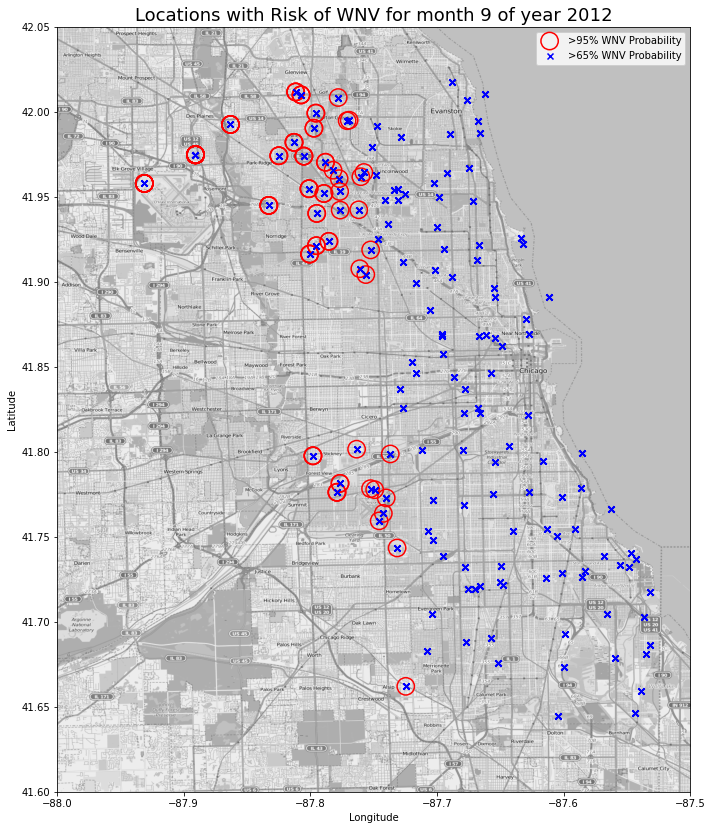

In [99]:
pred_map(df_2012_9, 2012, 9)

In year 2012, we can see that there were critically high probability of WNV occurrences in numerous areas but this was only predicted to occur in August. However in September, we can see that the number of locations with critically high probability of WNV occurrence drops. Using this, we can then use our production model to predict which areas are potential areas with high probability of WNV outbreaks, which are then areas to be targeted for spraying.

## Model Limitations

Our production model is not without its limitations. Although its prediction is satisfactory, our model is geographically limited to only Chicago, as the dataset that this model was trained on was only from this city. This means that we will not be able to get accurate results if this model were to be used anywhere else.

In addition, the datasets provided were limited in some ways. Firstly, the train dataset only consists of 4 years of data. Having more datasets collected across more years could potentially increase the accuracy of our model. Secondly, the years of data given were in alternate odd-numbered years. We might be able to train up a more robust model if we were to get consecutive years of data instead. Ideally, for these first 2 points aforementioned, it would be best if our train dataset could be as substantial as our weather dataset, consisting of years from 2007 to 2014, all in consecutive years. Lastly, our spray dataset was limited with only 2 years worth of data and as such, analysis to detect any patterns of the effectiveness of spraying was inconclusive.

## Conclusion

To conclude this project, we achieved satisfactory result in the training of a predictive model for West Nile Virus (WNV) in Chicago using the provided dataset. The model that we chose as our production model was the Logistic Regression using class weights, reason being it had low degree of overfit (2%), as well as good test AUC and recall scores as compared to many other models, including models using SMOTE.

During Exploratory Data Analysis (EDA), we discovered that only 2 species of mosquitoes carry WNV: Culex Pipiens and Culex Restuans. Summer months from June to August, the hottest months in Chicago, exacerbated the breeding of mosquitoes and which in turn increase the number of WNV occurences.

An interesting finding was that temperature and humidity are lead indicators of the virus occurrence. Peaks in the weekly average temperature and humidity come just 2-3 weeks before peaks in the percentage of the presence of the virus. This makes sense in accordance to the life-cycle of a mosquito: favorable weather conditions encourage breeding and growth of mosquitoes, which subsequently results in the rampant spread of WNV as they turn into their adult stage after 2-3 weeks. We feature engineered time lag columns for these weather indicators, and expectedly, they were the strongest predictors in predicting WNV.

For Cost-Benefit Analysis, we researched the total cost of spraying at between \\$844k to \\$1.69 million. That is less than half of what medical costs plus productivity loss would be, at a calculated value of around \\$3.7 million. This shows that even though there will be higher spendage in spraying operations, increased spraying operations would reduce the number of WNV occurences and patients, which would ultimately reduce medical costs and therefore overall costs. With evidence that spraying does in fact curb WNV through our analysis on spray efficacy, we believe that prevention is the best solution. By using our production model and map visualization function, we are able to predict high and moderate risks of WNV for each month of each year, and the locations they would occur. This would help to increase accuracy in spraying different parts of Chicago with risks of WNV, as well as greatly reduce inaccurate or inadequate spraying that would incur further costs.

Our production model is not without its limitations. Although its prediction is satisfactory, our model is geographically limited to only Chicago, as the dataset that this model was trained on was only from this city. This means that we will not be able to get accurate results if this model were to be used anywhere else. In addition, the data provided for training were limited and in alternate odd-numbered years. We might be able to train up a more robust model if we were to get consecutive years of data instead.